In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

### Step 2: Read in dataset

In [2]:
df = pd.read_csv('/Users/switt/Documents/GitHub/TECH6303/datasets/flavors_of_cacao.csv')
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


#### Rename columns to remove blank spaces

In [3]:
df.columns = ['Company','SpecificBeanOrigin','REF','ReviewDate','CocoaPercent','CompanyLocation','Rating','BeanType','BroadBeanOrigin']

In [4]:
df.head()

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


### Step 3. Exploring the dataset

#### How many tuples (rows) are in the dataset?

In [32]:
print("There are {} tuples in the dataset.".format(len(df)))

There are 1788 tuples in the dataset.


#### How many unique company names are in the dataset?

In [35]:
print("There are {} unique company names in the dataset.".format(len(df.Company.unique())))

There are 415 unique company names in the dataset.


#### How many reviews were made in 2013?

In [36]:
#df.groupby(['ReviewDate']).count()
print("There were {} reviews made in 2013.".format(len(df[df.ReviewDate == 2013])))

There were 184 reviews made in 2013.


#### How many missing values in BeanType?

In [38]:
#Assuming that all empty cells are coded the same as the empty cell in the first row...
print("There are {} missing values in the Bean Type column.".format(len(df[df.BeanType == df['BeanType'][0]])))

There are 885 missing values in the Bean Type column.


### Step 4. Visualization

#### Visualize ratings column as histogram

Text(0.5, 0, 'Ratings')

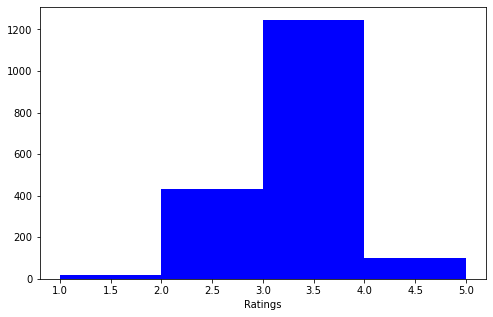

In [13]:
ratings = df.Rating.values

plt.figure(figsize = (8,5))
plt.hist(ratings, bins=4, color="blue")
plt.xlabel("Ratings")

### Step 5. Create scatter plot showing relationship between Cocoa Percent and Rating

In [ ]:
#1. Convert CocoaPercent from string to int
df["CocoaPercent"] = df["CocoaPercent"].str.replace(r'\D','').astype(int)

Text(0, 0.5, 'ratings')

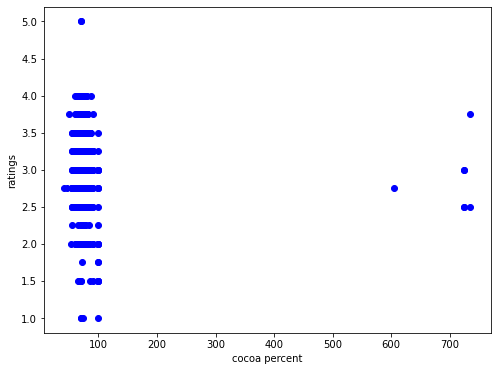

In [18]:
#2. Create scatter plot

cocoapercent = df.CocoaPercent.values
ratings = df.Rating.values

plt.figure(figsize=(8,6))
plt.scatter(cocoapercent,ratings,color="blue")
plt.xlabel('cocoa percent')
plt.ylabel('ratings')

In [19]:
df.describe()

,REF,ReviewDate,CocoaPercent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,74.192758,3.185933
std,552.886365,2.927210,40.426829,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,735.000000,5.000000


In [20]:
# Remove outlier values from Cocoa Percent column
df.drop(df[df.CocoaPercent > 100].index, inplace=True)

Text(0, 0.5, 'ratings')

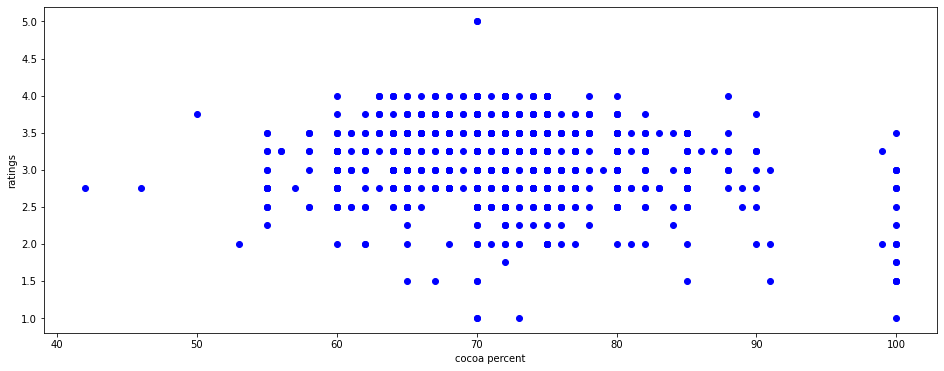

In [39]:
#2. Recreate scatter plot

cocoapercent = df.CocoaPercent.values
ratings = df.Rating.values

plt.figure(figsize=(16,6))
plt.scatter(cocoapercent,ratings,color="blue")
plt.xlabel('cocoa percent')
plt.ylabel('ratings')

Text(0, 0.5, 'ratings')

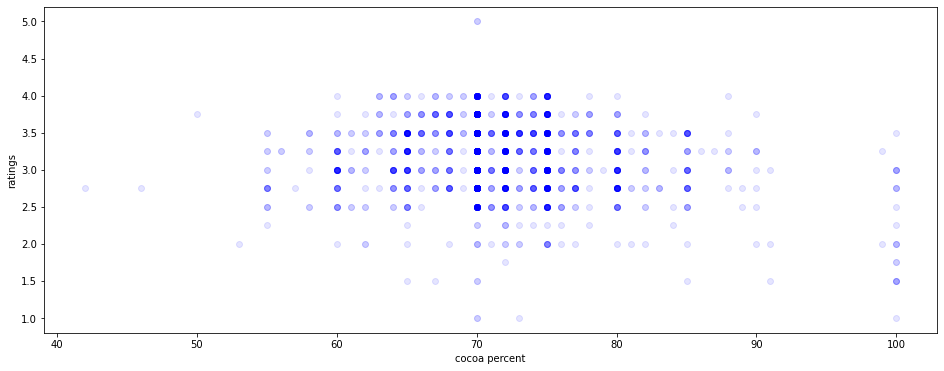

In [40]:
# Recreate scatter plot again scaling data points by overlap
cocoapercent = df.CocoaPercent.values
ratings = df.Rating.values

plt.figure(figsize=(16,6))
plt.scatter(cocoapercent,ratings,color="blue",alpha=0.1)
plt.xlabel('cocoa percent')
plt.ylabel('ratings')

Comments: There does not appear to be any linear relationship between cocoa percent and rating.

### Step 6. Normalize Ratings column

In [24]:
scaler = preprocessing.StandardScaler()

x = df.iloc[:,6:7].values

x_normalized = scaler.fit_transform(x)

In [25]:
x_normalized

array([[ 1.1781045 ],
       [-0.9152628 ],
       [-0.39192097],
       ...,
       [ 0.65476267],
       [ 0.13142085],
       [-0.39192097]])

### Step 7. Challenge: List companies ordered by average rating

In [26]:
df.groupby("Company")["Rating"].agg(["mean"]).sort_values(by = "mean", ascending=False)

,mean
Company,
Tobago Estate (Pralus),4.000000
Heirloom Cacao Preservation (Zokoko),3.875000
Ocelot,3.875000
Amedei,3.846154
Matale,3.812500
...,...
Ki' Xocolatl,2.000000
Majani,2.000000
Callebaut,1.875000


### Step 8. Encode the two categorical columns with encoder

In [27]:
#Use ordinal encoder

encoder = preprocessing.OrdinalEncoder()

df[["Company","CompanyLocation"]] = encoder.fit_transform(df[["Company","CompanyLocation"]])

In [28]:
df.head()

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,0.0,Agua Grande,1876,2016,63,18.0,3.75,,Sao Tome
1,0.0,Kpime,1676,2015,70,18.0,2.75,,Togo
2,0.0,Atsane,1676,2015,70,18.0,3.00,,Togo
3,0.0,Akata,1680,2015,70,18.0,3.50,,Togo
4,0.0,Quilla,1704,2015,70,18.0,3.50,,Peru
